In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("location od cities.csv")
df

,Cities,#1,#2,#3,#4,#5,#6,#7,#8,#9,#10,#11
0,X-axis,18,20,11,3,3,6,17,6,17,5,19
1,Y-axis,7,4,6,13,10,8,17,12,11,19,6


In [4]:
# 도시좌표
data = {
    'City': ['#1', '#2', '#3', '#4', '#5', '#6', '#7', '#8', '#9', '#10', '#11'],
    'X': [18, 20, 11, 3, 3, 6, 17, 6, 17, 5, 19],
    'Y': [7, 4, 6, 13, 10, 8, 17, 12, 11, 19, 6]
}

df = pd.DataFrame(data)
df

,City,X,Y
0,#1,18,7
1,#2,20,4
2,#3,11,6
3,#4,3,13
4,#5,3,10
5,#6,6,8
6,#7,17,17
7,#8,6,12
8,#9,17,11
9,#10,5,19


In [5]:
# 거리계산함수 
def calculate_distance(x1, y1, x2, y2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

In [6]:
# 거리행렬 생성
distances = pd.DataFrame(index=df['City'], columns=df['City'])
distances

City,#1,#2,#3,#4,#5,#6,#7,#8,#9,#10,#11
City,,,,,,,,,,,
#1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
for i in range(len(df)): #도시의 개수만큼 반복
    for j in range(len(df)):
        distances.iloc[i, j] = calculate_distance(df.iloc[i]['X'], df.iloc[i]['Y'], df.iloc[j]['X'], df.iloc[j]['Y']) #거리계산함수

distances

City,#1,#2,#3,#4,#5,#6,#7,#8,#9,#10,#11
City,,,,,,,,,,,
#1,0.0,3.605551,7.071068,16.155494,15.297059,12.041595,10.049876,13.0,4.123106,17.691806,1.414214
#2,3.605551,0.0,9.219544,19.235384,18.027756,14.56022,13.341664,16.124515,7.615773,21.213203,2.236068
#3,7.071068,9.219544,0.0,10.630146,8.944272,5.385165,12.529964,7.81025,7.81025,14.317821,8.0
#4,16.155494,19.235384,10.630146,0.0,3.0,5.830952,14.56022,3.162278,14.142136,6.324555,17.464249
#5,15.297059,18.027756,8.944272,3.0,0.0,3.605551,15.652476,3.605551,14.035669,9.219544,16.492423
#6,12.041595,14.56022,5.385165,5.830952,3.605551,0.0,14.21267,4.0,11.401754,11.045361,13.152946
#7,10.049876,13.341664,12.529964,14.56022,15.652476,14.21267,0.0,12.083046,6.0,12.165525,11.18034
#8,13.0,16.124515,7.81025,3.162278,3.605551,4.0,12.083046,0.0,11.045361,7.071068,14.317821
#9,4.123106,7.615773,7.81025,14.142136,14.035669,11.401754,6.0,11.045361,0.0,14.422205,5.385165


In [8]:
#이웃해 생성, 도시 2개 위치 교환이동
def neighbor(route):
    neighborhood = []
    for i in range(len(route)):
        for j in range(i + 1, len(route)): #모든 가능한 도시 쌍 선택
            neighbor = list(route)
            neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
            neighborhood.append(neighbor)
    return neighborhood

In [9]:
#총 거리 계산 함수
def calculate_total_distance(route, distances):  #route:도시의 순서를 나타내는 리스트, distances:도시 간의 거리 행렬
    total_distance = 0
    for i in range(len(route) - 1): #경로의 각 도시를 거침
        total_distance += distances.loc[route[i], route[i + 1]] #현재 도시,다음 도시 사이 거리 더함
    total_distance += distances.loc[route[-1], route[0]] #마지막 도시, 첫 번째 도시 간 거리 더해 경로 완주
    return total_distance

In [10]:
#tabu search 알고리즘

def tabu_search(distances, iteration, tabu_size, aspiration_level):
    num_cities = len(distances)
    best_route = list(distances.index)
    best_distance = calculate_total_distance(best_route, distances) 
    tabu_list = []

    for i in range(iteration):
        neighborhood = neighbor(best_route)
        neighborhood = [route for route in neighborhood if route not in tabu_list or calculate_total_distance(route, distances) < aspiration_level] 
        # Aspiration Level은 현재까지 발견된 최단 거리보다 더 짧은 거리를 기준으로 설정됨, 이 기준보다 짧은 거리를 가진 해는 더 나은 해일 가능성이 높다.
        #tabu_list에 있는 해라도 총 거리가 aspiration Level보다 작다면, 이는 더 나은 해일 가능성이 높기 때문에 탐색에 포함
        #tabu 리스트에 있지 않거나 열망 조건을 만족하는 이웃만을 선택

        if not neighborhood:
            break #유효한 이웃이 없으면 반복문 종료

        current_route = min(neighborhood, key=lambda route: calculate_total_distance(route, distances)) #이웃 중 가장 짧은 거리 경로 선택
        current_distance = calculate_total_distance(current_route, distances) #경로의 총 거리

        if current_distance < best_distance: #현재 경로가 최적 경로보다 짧으면 최적 경로 갱신
            best_route = current_route
            best_distance = current_distance

        tabu_list.append(current_route) #현재 경로 Tabu 리스트에 추가
        if len(tabu_list) > tabu_size: #tabu 리스트가 tabu_size 초과하면 가장 오래된 경로를 제거, 선입선출
            tabu_list.pop(0) #리스트의 첫반째 제거

    return best_route, best_distance #최적 경로, 그 경로의 총 거리

In [11]:
# tabu search 실행
iteration = 50
tabu_size = 50
aspiration_level = 50  # 열망 조건 설정
best_route, best_distance = tabu_search(distances, iteration, tabu_size, aspiration_level)

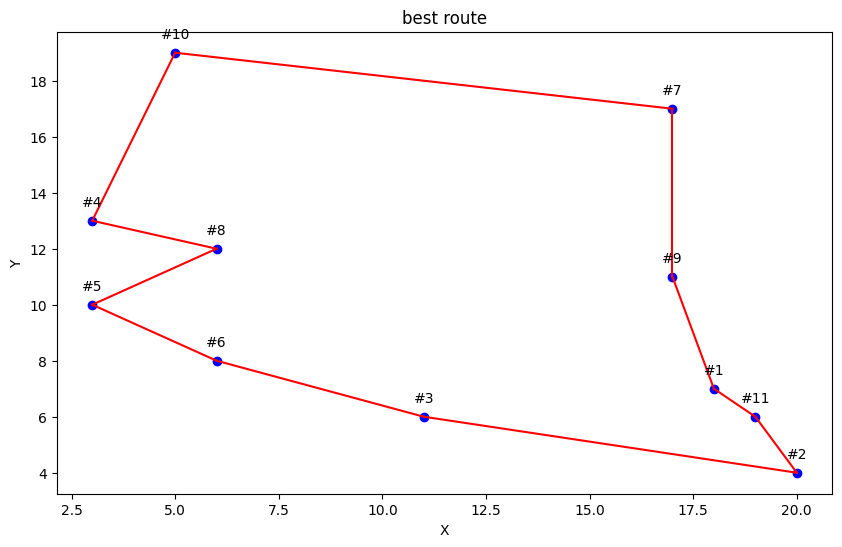

In [12]:
# 도시 좌표 시각화
plt.figure(figsize=(10, 6))
plt.scatter(df['X'], df['Y'], color='blue')

for i, txt in enumerate(df['City']): #도시 이름, 인덱스 가져옴
    plt.annotate(txt, (df['X'][i], df['Y'][i]), textcoords="offset points", xytext=(0,10), ha='center') #도시 이름 좌표 위에 표시

# 최단 경로 시각화
for i in range(len(best_route) - 1):
    city1 = best_route[i]
    city2 = best_route[i + 1]
    plt.plot([df[df['City'] == city1]['X'].values[0], df[df['City'] == city2]['X'].values[0]],
             [df[df['City'] == city1]['Y'].values[0], df[df['City'] == city2]['Y'].values[0]], 'r-') #도시 빨간색 선으로 연결

# 마지막 도시와 첫 번째 도시 연결, 경로 완성
plt.plot([df[df['City'] == best_route[-1]]['X'].values[0], df[df['City'] == best_route[0]]['X'].values[0]],
         [df[df['City'] == best_route[-1]]['Y'].values[0], df[df['City'] == best_route[0]]['Y'].values[0]], 'r-') 

plt.xlabel('X')
plt.ylabel('Y')
plt.title('best route')
plt.show()

In [13]:
print("Best Route:", best_route)
print("Best Distance:", best_distance)

Best Route: ['#11', '#2', '#3', '#6', '#5', '#8', '#4', '#10', '#7', '#9', '#1']
Best Distance: 57.241557021947486
